# Veranschaulichung des Datensatzes

### 1. Vorhandene Annotation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [9]:
# Datensatz einlesen
train_df = pd.read_csv("..\Korpora\Referenzdatensatz_HateSpeech_Deutsch\RefKorpHateSpeechDe_Train_OD.txt", sep="\t", header=0)
test_df = pd.read_csv("..\Korpora\Referenzdatensatz_HateSpeech_Deutsch\RefKorpHateSpeechDe_Test_OD.txt", sep="\t")

# Neue Spalte: Korpusname (ermittelt über die Korpus-ID)
def map_corp(id):
    id = str(id)
    if id[0] == '1': return 'GermEval18'
    elif id[0] == '2': return 'GermEval19'
    elif id[0] == '3': return 'HASOC19'
    elif id[0] == '4': return 'HASOC20'

train_df['Korpus'] = train_df['corpus_id'].map(map_corp)
train_df = train_df.set_index(keys="corpus_id")
test_df['Korpus'] = test_df['corpus_id'].map(map_corp)
test_df = test_df.set_index(keys="corpus_id")

df_ganz_detail = pd.concat([train_df, test_df])

df_ganz_detail = df_ganz_detail.drop(axis=1, labels=['tweet'])

Text(0.5, 0, 'Anzahl an Tweets')

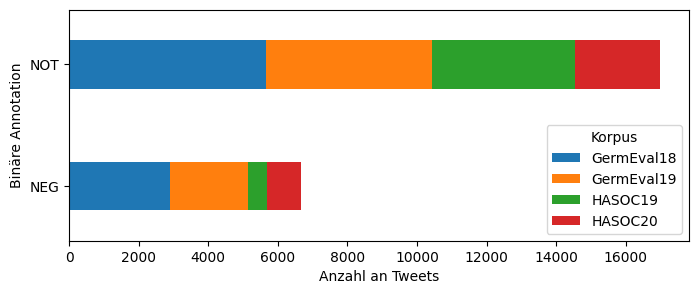

In [3]:
# Labelverteilung: NEG / nicht NEG

df_ganz = df_ganz_detail.drop(axis=1, labels="finelabel")
bylabel = df_ganz.groupby("binarylabel").Korpus.value_counts()

plt.style.use("default")
labelplot = bylabel.unstack().plot.barh(stacked="True", xlabel="Binäre Annotation", width=0.4, figsize=(8,3))
plt.xlabel("Anzahl an Tweets")

Text(0.5, 0, 'Anzahl an Tweets')

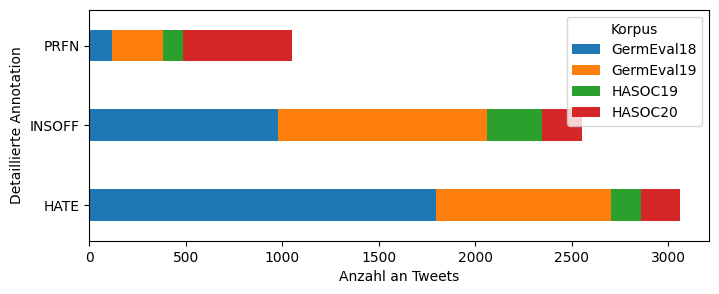

In [4]:
df_ganz_detail = df_ganz_detail.drop(df_ganz_detail[df_ganz_detail['binarylabel'] == "NOT"].index)
df_ganz_detail = df_ganz_detail.drop(axis=1, labels="binarylabel")

byfinelabel = df_ganz_detail.groupby(by="finelabel").Korpus.value_counts()

plt.style.use("default")
labelplot = byfinelabel.unstack().plot.barh(stacked="True", xlabel="Detaillierte Annotation", width=0.4, figsize=(8,3))
plt.xlabel("Anzahl an Tweets")

### 2. Neue Annotation: Volksverhetzung

#### Merkmal: Gruppe

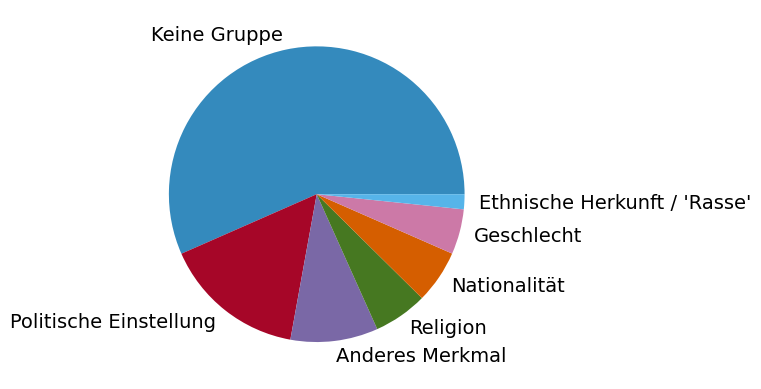

In [10]:
with open("..\Korpora\Referenzdatensatz_HateSpeech_Deutsch\HateSpeechDe_HATE_GruppeDetail.json", mode="r", encoding="utf-8") as gruppe:
    gruppe = json.load(gruppe)

# Problem Mehrfachnennungen: Einträge mit mehreren Labels duplizieren, so dass im DataFrame für pro Tweet pro Label eine Zeile steht
gruppe_sep = []
for eintrag in gruppe:
    for i in range(len(eintrag["label"])):
        gruppe_sep.append((int(eintrag["corpus_id"]), eintrag["tweet"], eintrag["label"][i]))

df_gruppe = pd.DataFrame(gruppe_sep, columns=['corpus_id', 'tweet', 'label'])
df_gruppe = df_gruppe.drop(axis=1, labels=["tweet", "corpus_id"])

plt.rcParams['font.size'] = '14'

plt.style.use("bmh")
labels = ["Keine Gruppe", "Politische Einstellung", "Anderes Merkmal", "Religion", "Nationalität", "Geschlecht", "Ethnische Herkunft / 'Rasse'"]
labelplot = df_gruppe.value_counts().plot.pie(y="label", label="", labels=labels)

#### Merkmal: Tathandlung

Text(0.5, 0, 'Anzahl an Tweets')

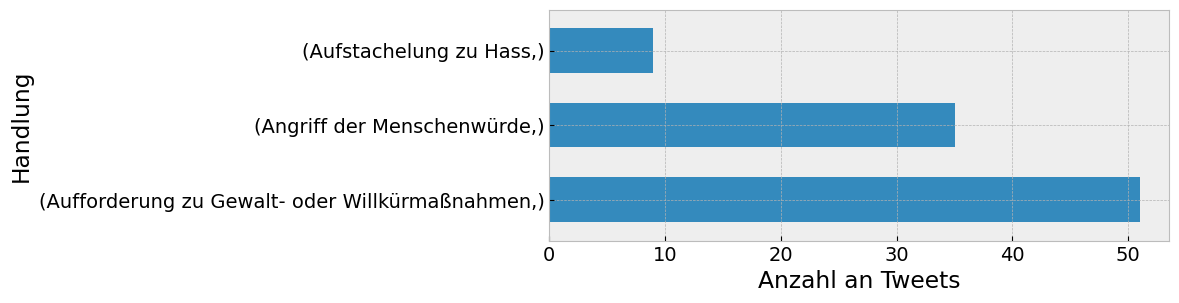

In [11]:
with open("..\Korpora\Referenzdatensatz_HateSpeech_Deutsch\HateSpeechDe_HATE_HandlungDetail.json", mode="r", encoding="utf-8") as hndl:
    handlung = json.load(hndl)

# Problem mehrerer Labels: separieren
handlung_sep = []
for eintrag in handlung:
    for i in range(len(eintrag["label"])):
        handlung_sep.append((int(eintrag["corpus_id"]), eintrag["tweet"], eintrag["label"][i]))

df_handlung = pd.DataFrame(handlung_sep, columns=['corpus_id', 'tweet', 'label'])
df_handlung = df_handlung.drop(axis=1, labels=["tweet", "corpus_id"])
df_handlung = df_handlung.drop(df_handlung[df_handlung['label'] == "KeineHandlung"].index)
df_handlung
plt.style.use("bmh")
labelplot = df_handlung.value_counts().plot.barh(y="label", xlabel="Handlung", width=0.6, figsize=(8,3))
plt.xlabel("Anzahl an Tweets")
